In [2]:
import pm4py

log = pm4py.read_xes('C:/Users/karat/PycharmProjects/innovation/12696884/BPI Challenge 2017.xes.gz')

print('trace: ', list(log[0].attributes.keys()))
print('event: ',list(log[0][0].keys()))

parsing log, completed traces :: 100%|██████████| 31509/31509 [01:43<00:00, 304.48it/s]

trace:  ['LoanGoal', 'ApplicationType', 'concept:name', 'RequestedAmount']
event:  ['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID', 'lifecycle:transition', 'time:timestamp']


In [40]:
#plithos traces, events, events of event log
from pm4py.objects.conversion.log import converter as log_conv_fact
event_log = log_conv_fact.apply(log, variant=log_conv_fact.TO_EVENT_STREAM)
print("Number of traces: ", len(log))
event_log = log_conv_fact.apply(log, variant=log_conv_fact.TO_EVENT_STREAM)
print("Number of events: ", len(event_log))

Number of traces:  31509
Number of events:  1202267
all events of trace attributes:  A_Create Application


In [142]:
y=list()
for i in range (len(log[0])):
    y.append(log[0][i]['concept:name'])
    a=set(y)
print('all events concept name: ', a)

all events concept name:  {'W_Call incomplete files', 'A_Incomplete', 'O_Create Offer', 'A_Validating', 'O_Accepted', 'A_Concept', 'O_Created', 'O_Returned', 'A_Complete', 'A_Create Application', 'O_Sent (mail and online)', 'W_Call after offers', 'W_Complete application', 'W_Validate application', 'A_Accepted', 'W_Handle leads', 'A_Pending', 'A_Submitted'}


In [4]:
#filtered_log
from pm4py.algo.filtering.log.timestamp import timestamp_filter
filtered_log = timestamp_filter.filter_traces_contained(log, "2016-02-09 00:00:00", "2016-03-09 23:59:59")
print(filtered_log)

[{'attributes': {'LoanGoal': 'Unknown', 'ApplicationType': 'New credit', 'concept:name': 'Application_735592901', 'RequestedAmount': 0.0}, 'events': [{'Action': 'Created', 'org:resource': 'User_13', 'concept:name': 'A_Create Application', 'EventOrigin': 'Application', 'EventID': 'Application_735592901', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2016, 2, 9, 8, 31, 28, 260000, tzinfo=datetime.timezone.utc)}, '..', {'Action': 'Deleted', 'org:resource': 'User_68', 'concept:name': 'W_Validate application', 'EventOrigin': 'Workflow', 'EventID': 'Workitem_1039580880', 'lifecycle:transition': 'ate_abort', 'time:timestamp': datetime.datetime(2016, 2, 22, 9, 27, 5, 841000, tzinfo=datetime.timezone.utc)}]}, '....', {'attributes': {'LoanGoal': 'Unknown', 'ApplicationType': 'New credit', 'concept:name': 'Application_288856123', 'RequestedAmount': 0.0}, 'events': [{'Action': 'Created', 'org:resource': 'User_17', 'concept:name': 'A_Create Application', 'EventOrigin': 'Ap

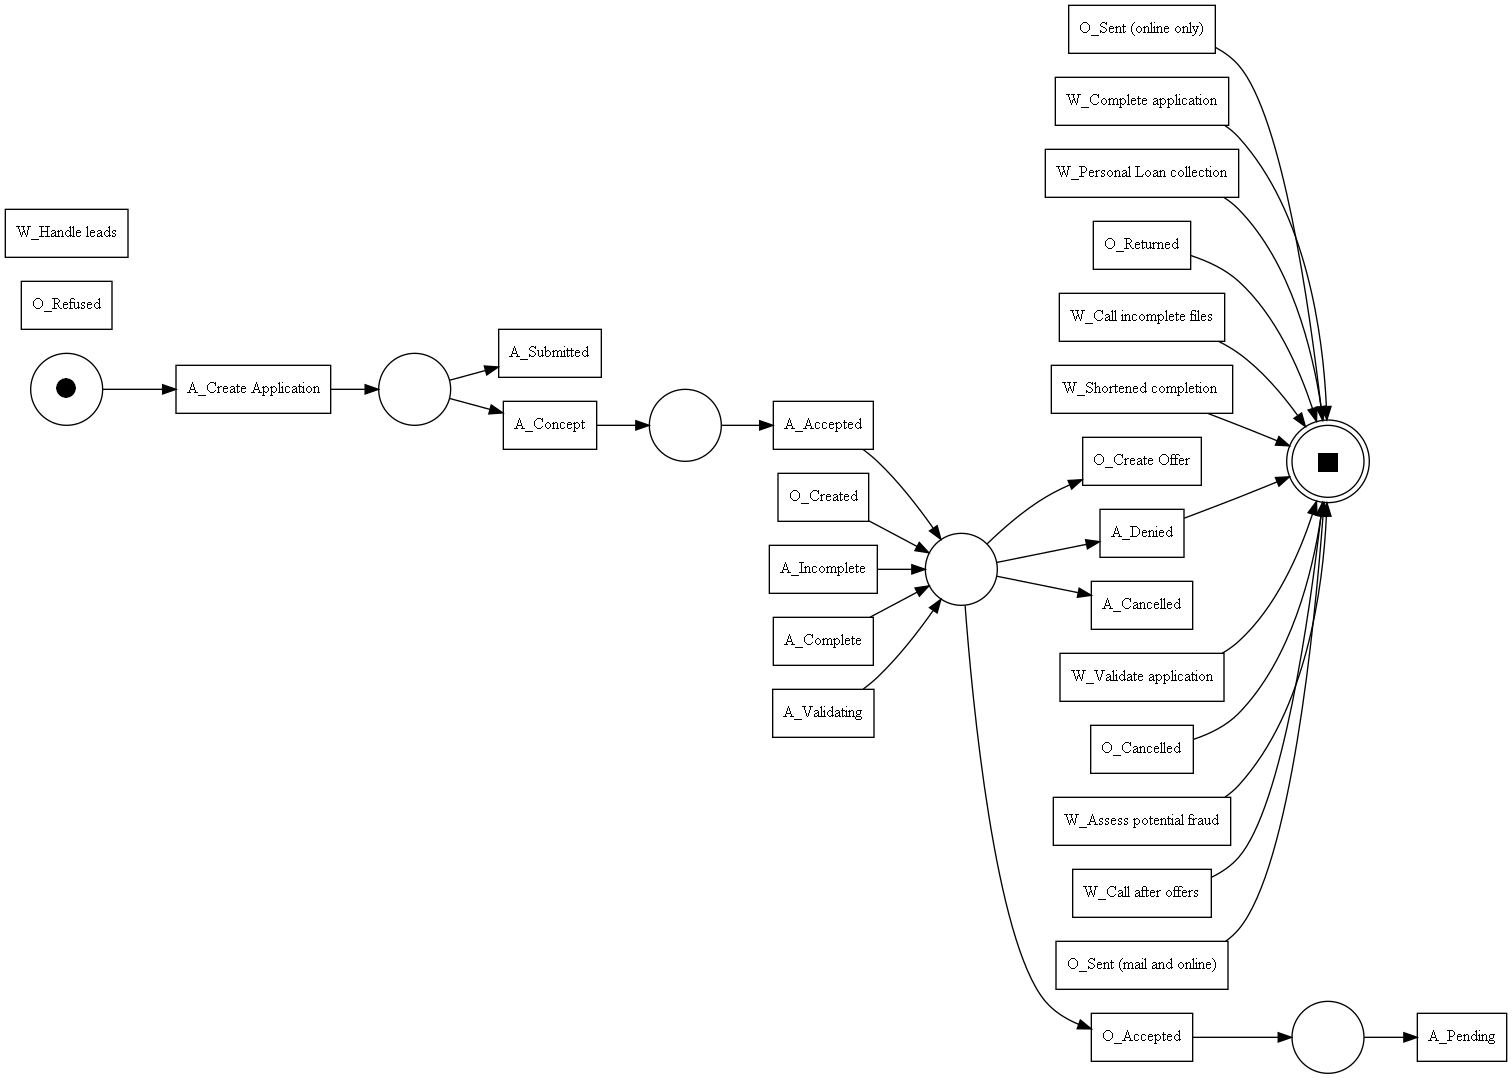

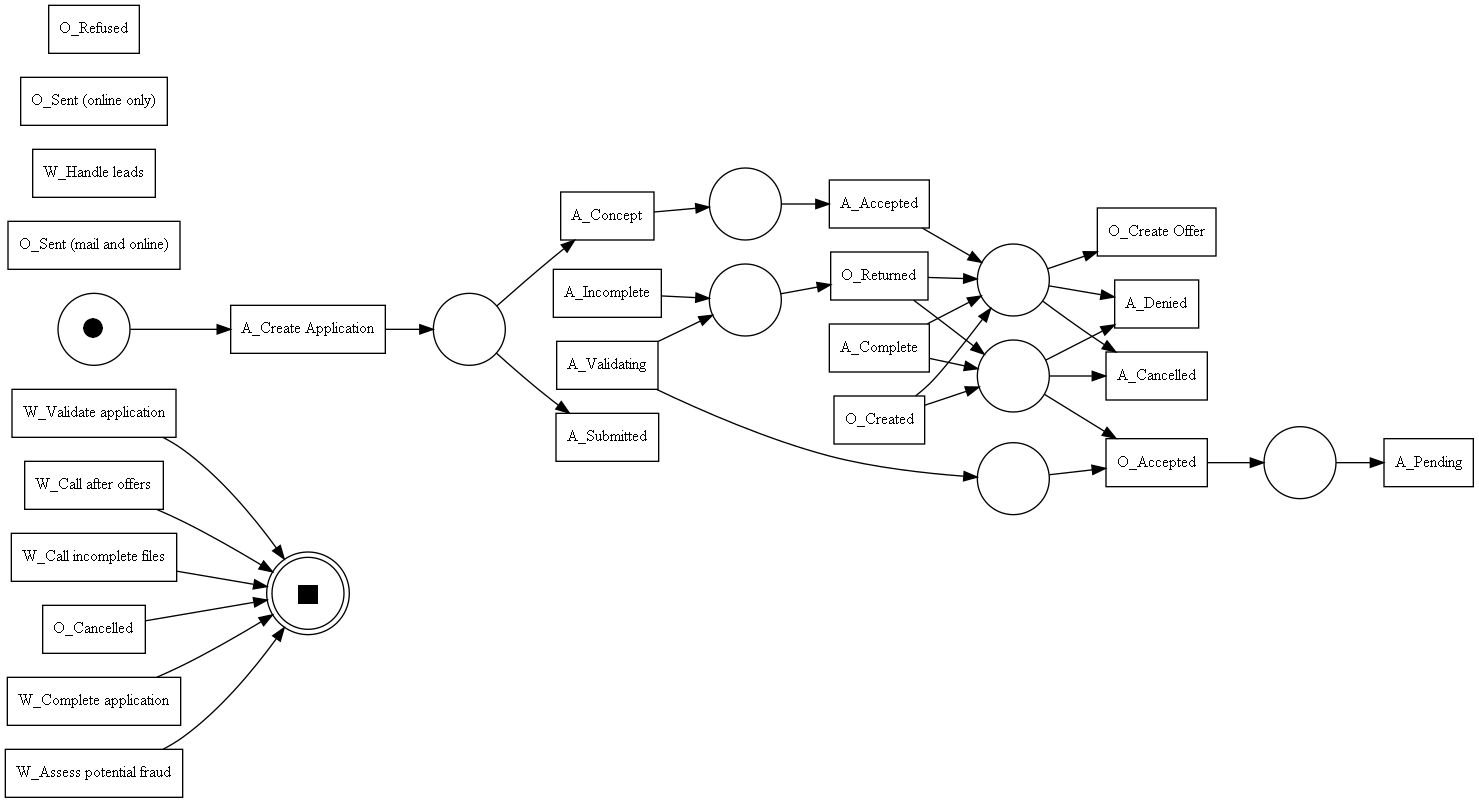

In [6]:
#alpha miner
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net1, initial_marking1, final_marking1 = alpha_miner.apply(log)
net2, initial_marking2, final_marking2 = alpha_miner.apply(filtered_log)

from pm4py.visualization.petri_net import visualizer as pn_vis

gviz1= pn_vis.apply(net1, initial_marking1, final_marking1 )
pn_vis.save(gviz1, "alphaminer1.jpg")
pn_vis.view(gviz1)

gviz2= pn_vis.apply(net2, initial_marking2, final_marking2 )
pn_vis.save(gviz2, "alphaminer2.jpg")
pn_vis.view(gviz2)

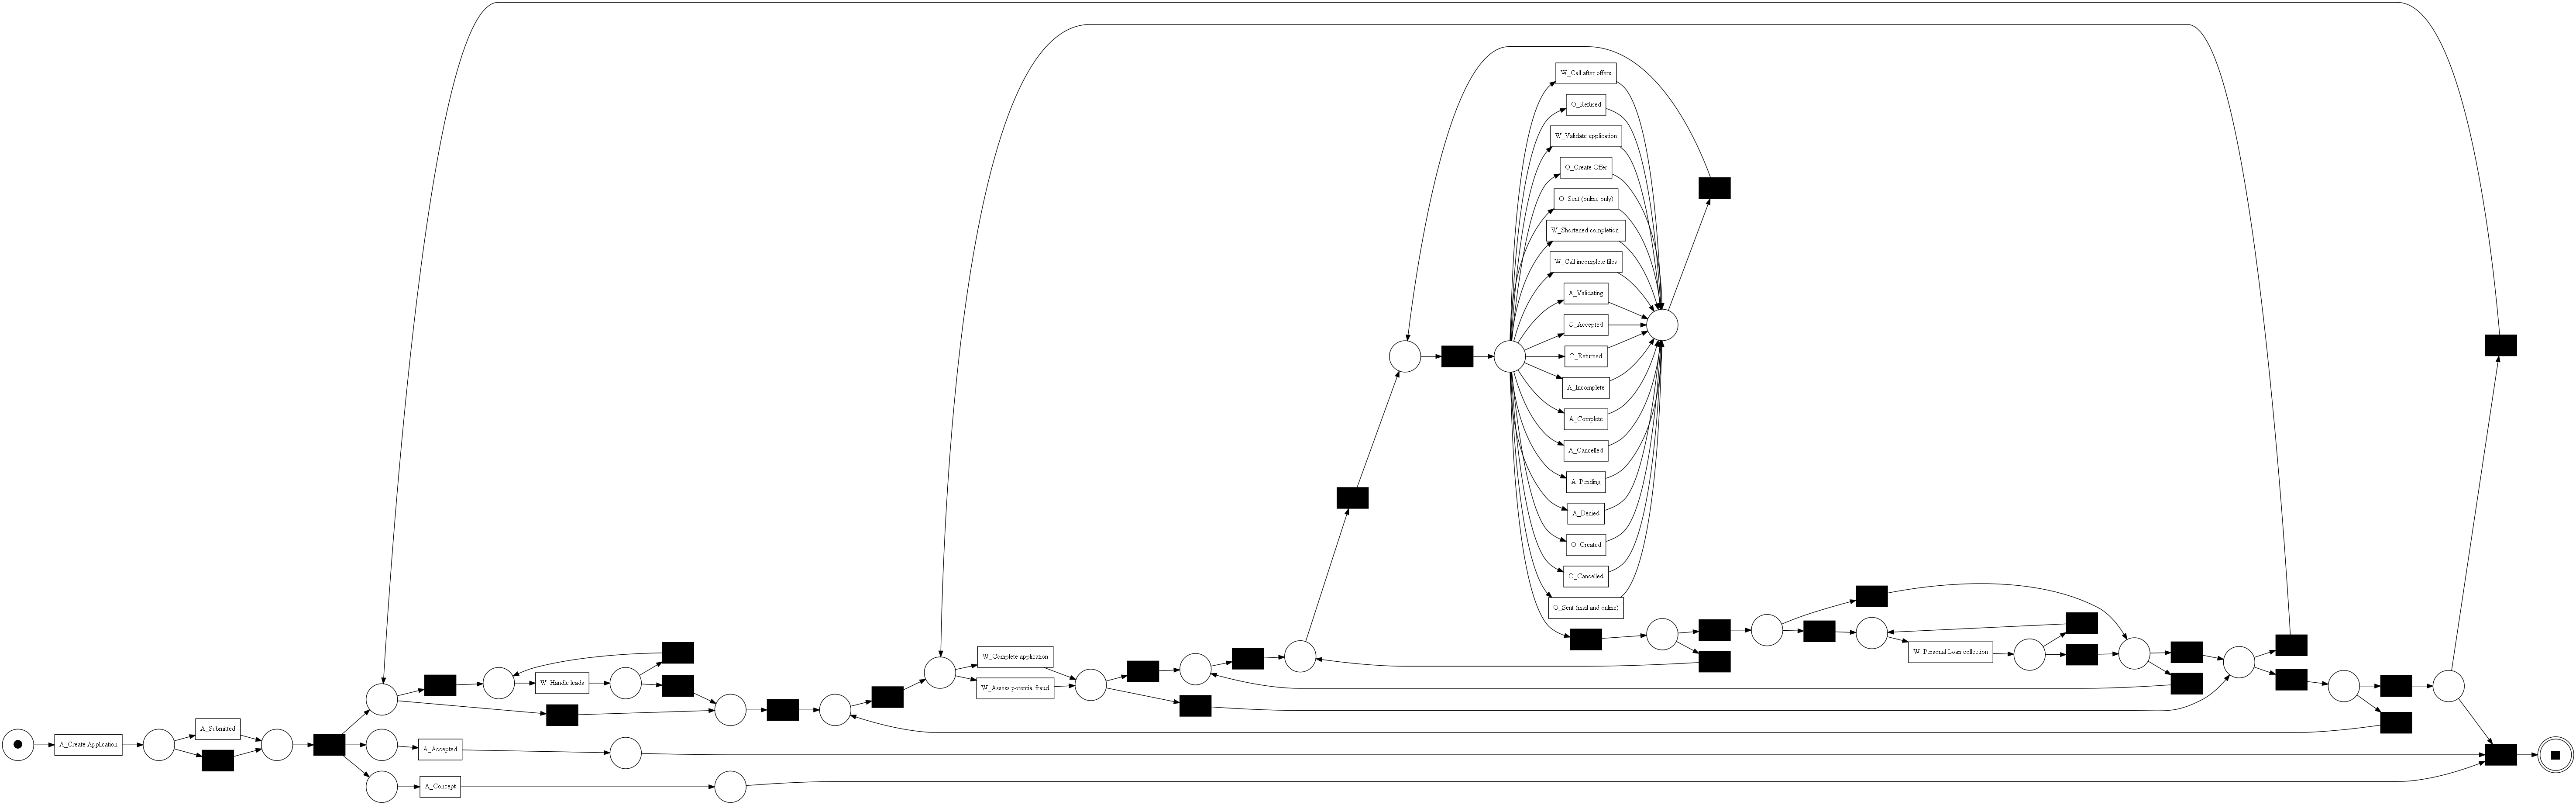

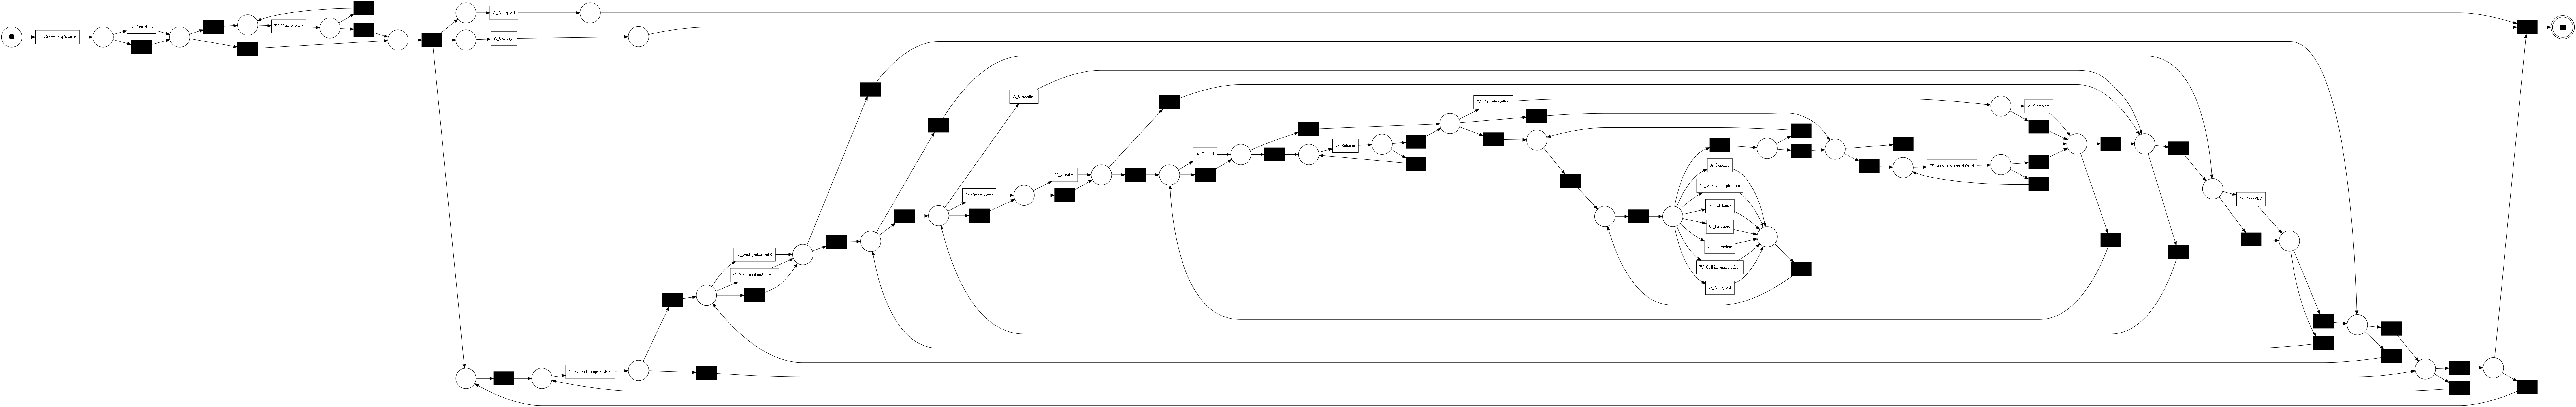

In [7]:
#inductive miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
net3, initial_marking3, final_marking3 = inductive_miner.apply(log)
net4, initial_marking4, final_marking4 = inductive_miner.apply(filtered_log)

gviz3= pn_vis.apply(net3, initial_marking3, final_marking3 )
pn_vis.save(gviz3, "inductiveminer3.jpg")
pn_vis.view(gviz3)

gviz4= pn_vis.apply(net4, initial_marking4, final_marking4 )
pn_vis.save(gviz4, "inductiveminer4.jpg")
pn_vis.view(gviz4)


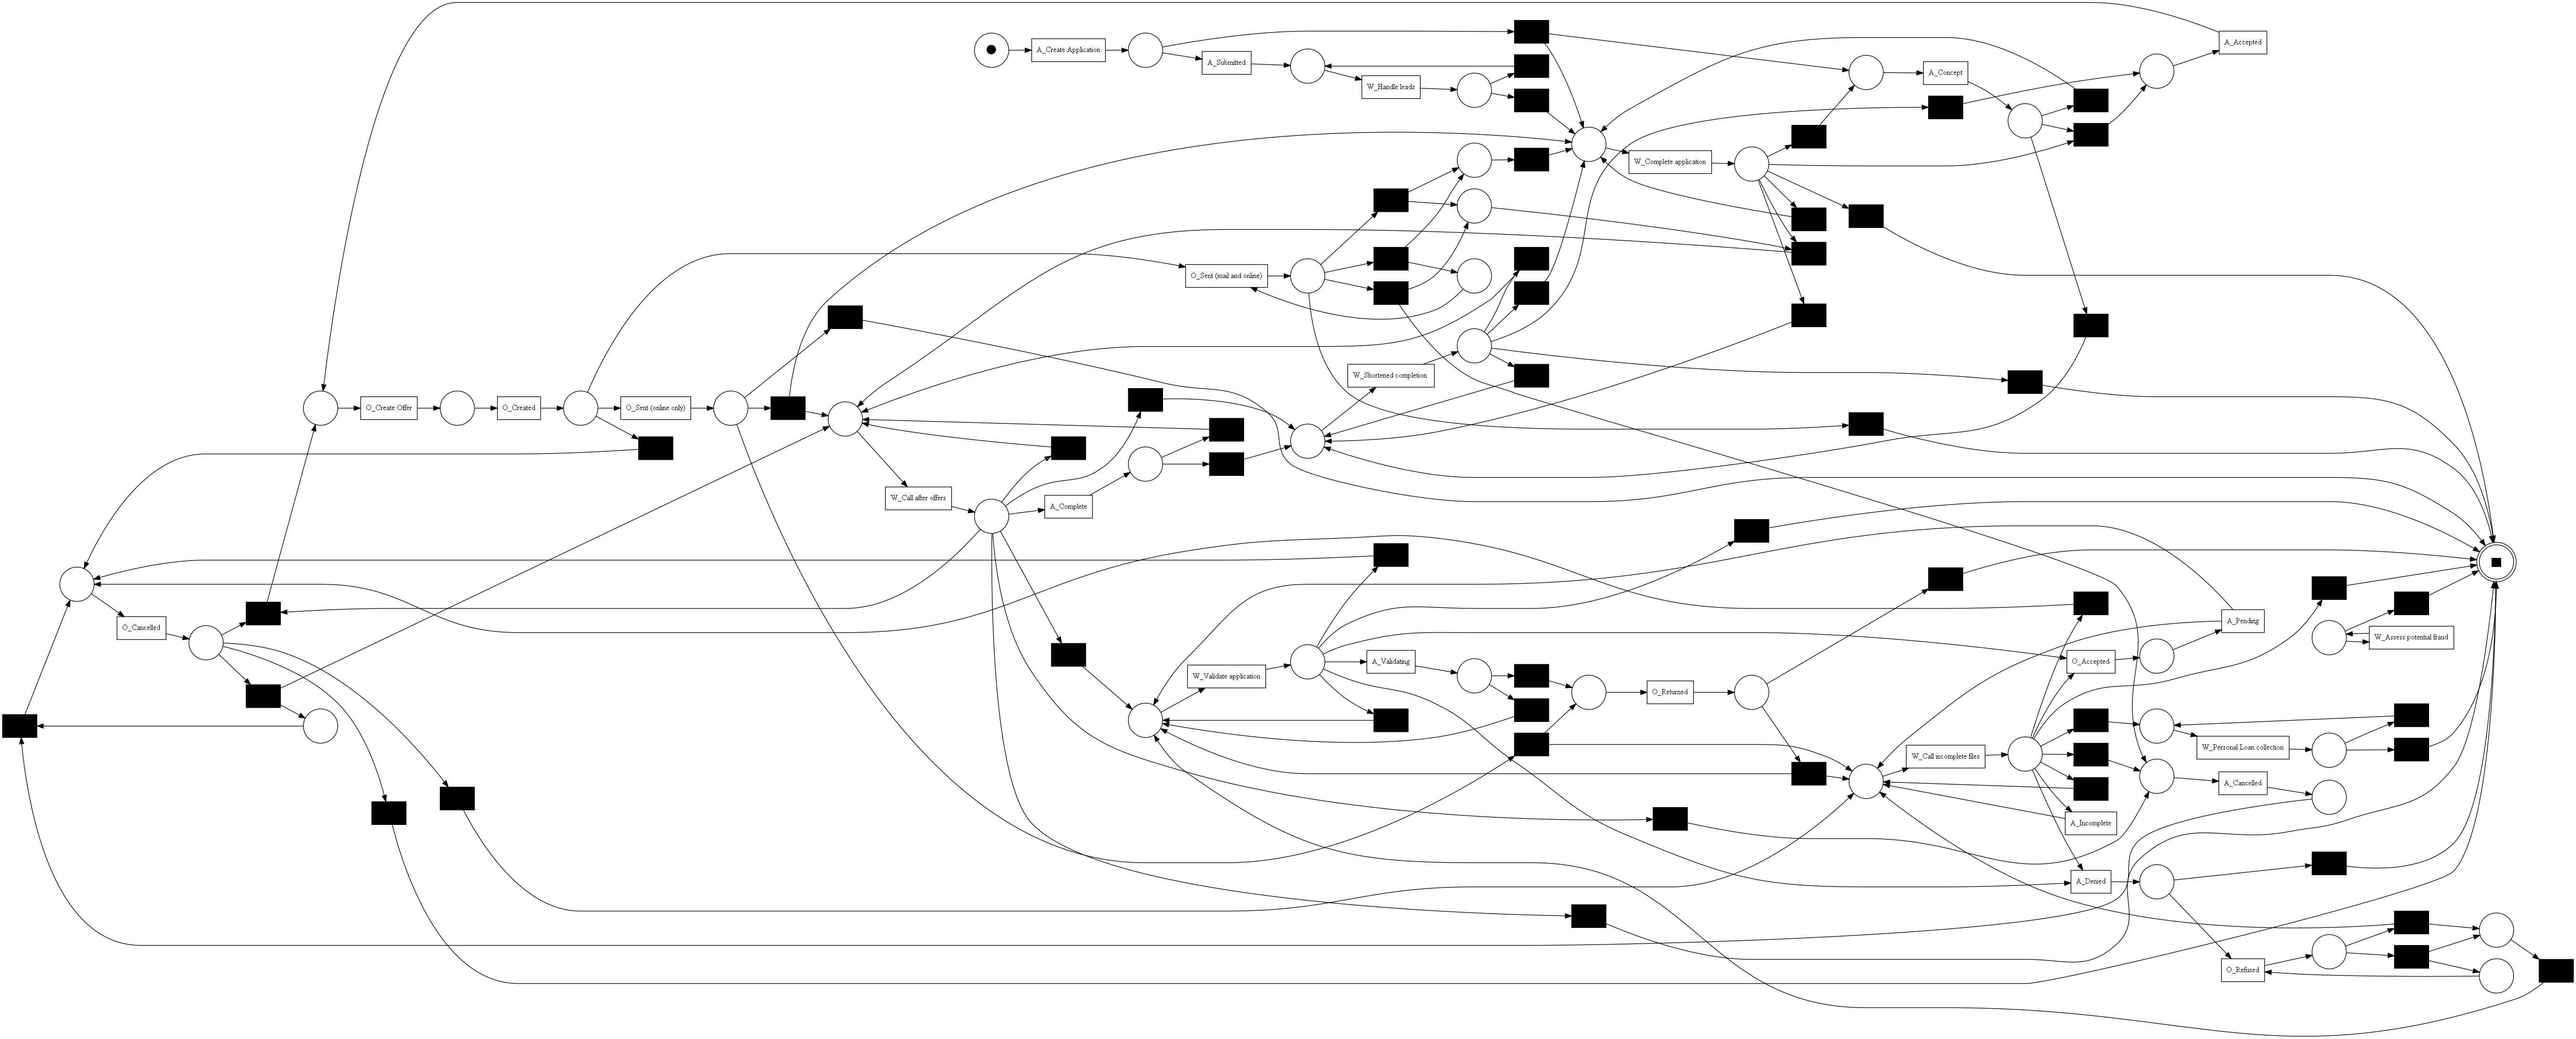

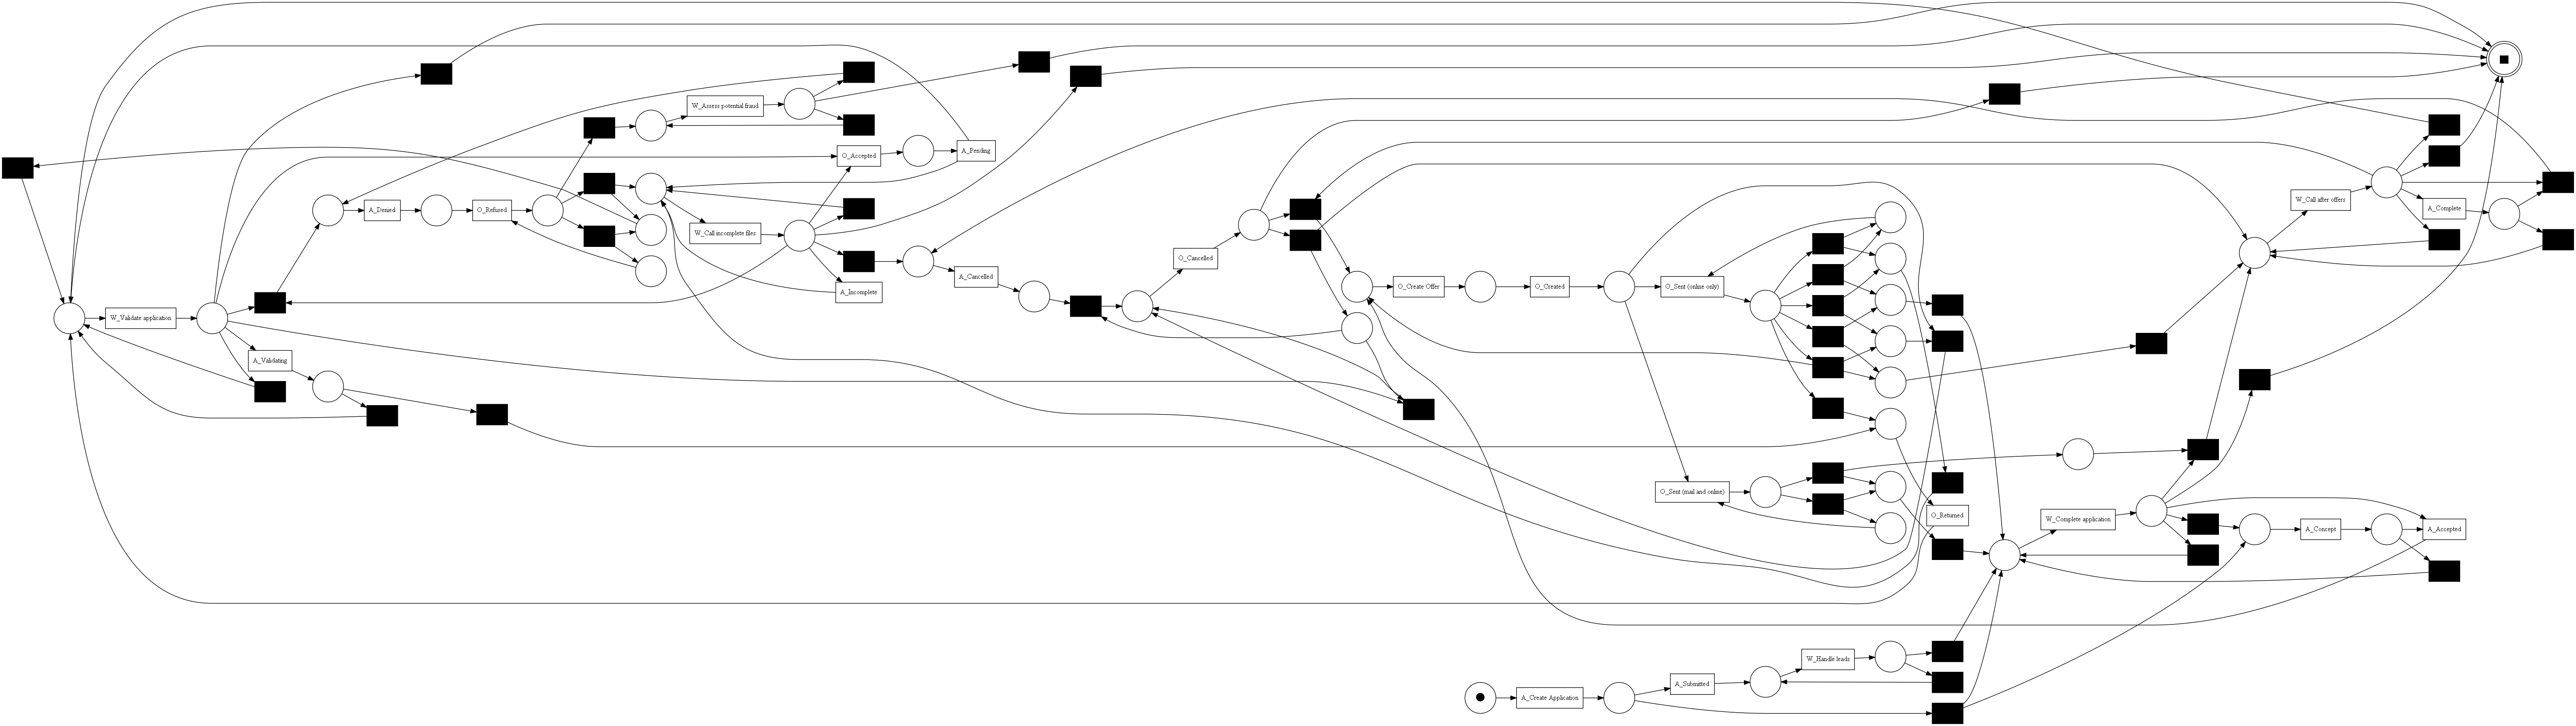

In [8]:
#heuristic miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net5, initial_marking5, final_marking5 = heuristics_miner.apply(log)
net6, initial_marking6, final_marking6 = heuristics_miner.apply(filtered_log)

gviz5= pn_vis.apply(net5, initial_marking5, final_marking5 )
pn_vis.save(gviz5, "heuristicminer5.jpg")
pn_vis.view(gviz5)

gviz6= pn_vis.apply(net6, initial_marking6, final_marking6 )
pn_vis.save(gviz6, "heuristicminer6.jpg")
pn_vis.view(gviz6)

In [9]:
#eval alpha miner
from pm4py.evaluation import evaluator as evaluation_factory
evaluation_result1 = evaluation_factory.apply(log, net1, initial_marking1, final_marking1)
print('Eval result with alpha for log', evaluation_result1)

#eval alpha miner for filtered_log
evaluation_result2 = evaluation_factory.apply(filtered_log, net2, initial_marking2, final_marking2)
print('Eval result with alpha for filtered_log', evaluation_result2)


C:\Users\karat\AppData\Local\Temp\ipykernel_29048\725615336.py:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0. Use the pm4py.algo.evaluation.evaluator class
  evaluation_result1 = evaluation_factory.apply(log, net1, initial_marking1, final_marking1)
C:\Users\karat\AppData\Local\Programs\Python\Python39\lib\site-packages\pm4py\evaluation\evaluator.py:68: UserWarning: Use the pm4py.algo.evaluation.evaluator class
  warnings.warn("Use the pm4py.algo.evaluation.evaluator class")
replaying log with TBR, completed variants :: 100%|██████████| 263907/263907 [10:18<00:00, 426.61it/s] 
C:\Users\karat\AppData\Local\Temp\ipykernel_29048\725615336.py:7: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0. Use the pm4py.algo.evaluation.evaluator class
  evaluation_result2 = evaluation_factory.apply(filtered_log, net2, initial_marking2, final_marking2)


Eval result with alpha for log {'fitness': {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.5752707737612655, 'log_fitness': 0.5568928180875521, 'percentage_of_fitting_traces': 0.0}, 'precision': 0.09774787325689094, 'generalization': 0.9824200959583872, 'simplicity': 1.0, 'metricsAverageWeight': 0.6592651968257075, 'fscore': 0.16630523986616505}


replaying log with TBR, completed variants :: 100%|██████████| 11002/11002 [00:17<00:00, 626.98it/s]


Eval result with alpha for filtered_log {'fitness': {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.5995078708629722, 'log_fitness': 0.5858589657862192, 'percentage_of_fitting_traces': 0.0}, 'precision': 0.09235055027060712, 'generalization': 0.9538846754905153, 'simplicity': 1.0, 'metricsAverageWeight': 0.6580235478868354, 'fscore': 0.1595506892498182}


In [10]:
#eval inductive
evaluation_result3 = evaluation_factory.apply(log, net3, initial_marking3, final_marking3)
print('Eval result with inductive for log', evaluation_result3)

#eval inductive for filtered
evaluation_result4 = evaluation_factory.apply(filtered_log, net4, initial_marking4, final_marking4)
print('Eval result with inductive for filtered_log', evaluation_result4)

C:\Users\karat\AppData\Local\Temp\ipykernel_29048\1966463448.py:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0. Use the pm4py.algo.evaluation.evaluator class
  evaluation_result3 = evaluation_factory.apply(log, net3, initial_marking3, final_marking3)
replaying log with TBR, completed variants :: 100%|██████████| 263907/263907 [49:20<00:00, 89.15it/s]   
C:\Users\karat\AppData\Local\Temp\ipykernel_29048\1966463448.py:6: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0. Use the pm4py.algo.evaluation.evaluator class
  evaluation_result4 = evaluation_factory.apply(filtered_log, net4, initial_marking4, final_marking4)


Eval result with inductive for log {'fitness': {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}, 'precision': 0.10206495397534332, 'generalization': 0.9061218868464518, 'simplicity': 0.5724137931034483, 'metricsAverageWeight': 0.6451501584813109, 'fscore': 0.18522493362514972}


replaying log with TBR, completed variants :: 100%|██████████| 11002/11002 [01:27<00:00, 125.75it/s]


Eval result with inductive for filtered_log {'fitness': {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}, 'precision': 0.09145789314820407, 'generalization': 0.9169938184970101, 'simplicity': 0.6129032258064515, 'metricsAverageWeight': 0.6553387343629163, 'fscore': 0.1675884955752213}


In [11]:
#eval heuristic
evaluation_result5 = evaluation_factory.apply(log, net5, initial_marking5, final_marking5)
print('Eval result with heuristic for log', evaluation_result5)

#eval heuristic miner for filtered
evaluation_result6 = evaluation_factory.apply(filtered_log, net6, initial_marking6, final_marking6)
print('Eval result with heuristic for filtered_log', evaluation_result6)

C:\Users\karat\AppData\Local\Temp\ipykernel_29048\103225876.py:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0. Use the pm4py.algo.evaluation.evaluator class
  evaluation_result5 = evaluation_factory.apply(log, net5, initial_marking5, final_marking5)
replaying log with TBR, completed variants :: 100%|██████████| 263907/263907 [07:45<00:00, 567.19it/s] 
C:\Users\karat\AppData\Local\Temp\ipykernel_29048\103225876.py:6: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0. Use the pm4py.algo.evaluation.evaluator class
  evaluation_result6 = evaluation_factory.apply(filtered_log, net6, initial_marking6, final_marking6)


Eval result with heuristic for log {'fitness': {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.9431922134411813, 'log_fitness': 0.9507858485934311, 'percentage_of_fitting_traces': 0.0}, 'precision': 0.6710730616980617, 'generalization': 0.9170460885062405, 'simplicity': 0.5186721991701245, 'metricsAverageWeight': 0.7643942994919645, 'fscore': 0.7868092179733549}


replaying log with TBR, completed variants :: 100%|██████████| 11002/11002 [00:18<00:00, 600.73it/s]


Eval result with heuristic for filtered_log {'fitness': {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.9341509998706474, 'log_fitness': 0.9408755379889324, 'percentage_of_fitting_traces': 0.0}, 'precision': 0.7629957127545552, 'generalization': 0.8079794233993893, 'simplicity': 0.5277777777777778, 'metricsAverageWeight': 0.7599071129801637, 'fscore': 0.8426505246895163}


In [16]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces1 = token_replay.apply(log, net1, initial_marking1, final_marking1)

count = len(replayed_traces1)
print(count)

for i in range (len(replayed_traces1)):
    if replayed_traces1[i]['trace_fitness']==1:
        count = count-1
print(count)

replayed_traces2 = token_replay.apply(filtered_log, net2, initial_marking2, final_marking2)
count = len(replayed_traces2)
print(count)

for i in range (len(replayed_traces2)):
    if replayed_traces2[i]['trace_fitness']==1:
        count = count-1
print(count)

replaying log with TBR, completed variants :: 100%|██████████| 15930/15930 [00:45<00:00, 352.67it/s]


31509
31509


replaying log with TBR, completed variants :: 100%|██████████| 709/709 [00:01<00:00, 436.28it/s]

911
911


In [17]:
replayed_traces3 = token_replay.apply(log, net3, initial_marking3, final_marking3)
count = len(replayed_traces3)
print(count)

for i in range (len(replayed_traces3)):
    if replayed_traces3[i]['trace_fitness']==1:
        count = count-1
print(count)

replayed_traces4 = token_replay.apply(filtered_log, net4, initial_marking4, final_marking4)
count = len(replayed_traces4)
print(count)

for i in range (len(replayed_traces4)):
    if replayed_traces4[i]['trace_fitness']==1:
        count = count-1
print(count)

replaying log with TBR, completed variants :: 100%|██████████| 15930/15930 [03:18<00:00, 80.06it/s] 


31509
0


replaying log with TBR, completed variants :: 100%|██████████| 709/709 [00:14<00:00, 50.14it/s]

911
0


In [18]:
replayed_traces5 = token_replay.apply(log, net5, initial_marking5, final_marking5)
count = len(replayed_traces5)
print(count)

for i in range (len(replayed_traces5)):
    if replayed_traces5[i]['trace_fitness']==1:
        count = count-1
print(count)

replayed_traces6 = token_replay.apply(filtered_log, net6, initial_marking6, final_marking6)
count = len(replayed_traces6)
print(count)

for i in range (len(replayed_traces6)):
    if replayed_traces6[i]['trace_fitness']==1.0:
        count = count-1
print(count)

replaying log with TBR, completed variants :: 100%|██████████| 15930/15930 [03:42<00:00, 71.54it/s] 


31509
31509


replaying log with TBR, completed variants :: 100%|██████████| 709/709 [00:03<00:00, 184.91it/s]

911
911
